In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [2]:
def melon_age_search(age):
    
    titles = []
    artists = []
    genres = []
    lyrics = []
    
    cnt = 0
    
    age_url = 'https://www.melon.com/chart/age/list.htm'
    params = {
        'idx': 2,
        'chartType': 'YE',
        'chartGenre': 'KPOP',
        'chartDate': age,
        'moved': 'Y',
    }
    
    headers = {
        'Referer': 'https://www.melon.com/index.htm',
        'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
                       (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36')
    }
    
    html = requests.get(age_url, params = params, headers = headers)
    print(html)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    
    
    for tag in soup.select('.t_left'):
        try:
            #제목
            playsong = tag.select_one('.rank01 a[href*=playSong]')
            title = playsong['title']
            js = playsong['href']
            titles.append(title)
            
            #아티스트
            artist_detail = tag.select_one('.rank02 .checkEllipsis a')
            artist = artist_detail.text
            artists.append(artist)
            
            
            #앨범명
#             album_detail = tag.select_one('.rank03 a')
#             album = album_detail.text
            
                  
        except:
            continue
    
        # JavaScript 부분에서 songIds 추출 (정규표현식 사용)
        # 숫자 부분을 ()로 묶어 그룹화, ')'기호는 이스케이프 처리
        matched = re.search(r",'(\d+)'\);", js)
        if matched:
            song_id = matched.group(1)
            song_url = 'https://www.melon.com/song/detail.htm?songId=' + song_id
        
        #print(title, js, album, song_url)
        
        html = requests.get(song_url, headers = headers)
        soup = BeautifulSoup(html.text, 'html.parser')
        
        #장르 
        genre = soup.find('dl',{'class':'list'}).get_text()
        genre = genre.split('\n')[6]
        genres.append(genre)
       
    
        #가사
        tag = soup.find(id='d_video_summary')
        tag = str(tag)
        tag = tag.replace('<div class="lyric" id="d_video_summary">', '').\
            replace('<!-- height:auto; 로 변경시, 확장됨 -->', '').\
            replace('<br/>', '/').replace('</div>', '').strip()
        lyrics.append(tag)    
        
        ### 추출 건수 제어를 위해 if문에서 cnt 사용
        cnt += 1
        if cnt == 100:
            break
        ###
        
    info_dict = {'Year':age,
                 'Title':titles,
                 'Artist':artists,
                 'Genre': genres,
                 'Lyric':lyrics}
    df_song = pd.DataFrame(info_dict)
    return df_song
    
 


  

In [234]:
# melon_age_search(2020)

In [235]:
#melon_age_search(2020).to_csv("2020.csv", mode='w', encoding='euc-kr')

In [236]:
#melon_age_search(2019).to_csv("2019.csv", mode='w', encoding='euc-kr')

In [ ]:
#melon_age_search(2018).to_csv("2018.csv", mode='w', encoding='euc-kr')

# 자연어처리

In [20]:
#!pip install nltk==3.4
#nltk.download()

In [2]:
import nltk
from nltk.corpus import stopwords

from konlpy.tag import Okt  
okt=Okt()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
m = pd.read_csv('man_lyrics.csv')
m.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
0,50,2020,00:00 (Zero O’Clock),방탄소년단,랩/힙합,그런 날 있잖아/이유 없이 슬픈 날/몸은 무겁고/나 빼곤 모두 다/바쁘고 치열해 보...
1,82,2015,가슴 뛰도록,SG 워너비,발라드,사랑해 사랑해 사랑해 /매일 아침 눈을 뜰 때마다 /나를 설레게 하는 사람 /나의 ...
2,16,2018,가을 안부,먼데이 키즈 (Monday Kiz),발라드,어떠니 잘 지냈니 지난 여름/유난히도 힘에 겹더라 올핸/새벽녘엔 제법 쌀쌀한 바람이...
3,50,2018,가을 타나 봐,바이브,발라드,계절은 돌고 돌아 돌아오는데/사랑은 돌고 돌아 떠나버리고/추억을 돌고 돌아 멈춰 서...
4,1,2015,같은 시간 속의 너,나얼,R&B/Soul,꼭 그러지 않아도 /충분히 널 이해할 수 있어/다른 사람 곁에 서 있는 니 모습이/...


In [252]:
w = pd.read_csv('woman_lyrics.csv')
w.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
0,38,2018,#첫사랑,볼빨간사춘기,포크/블루스,어릴 때 넌 키도 작고/빼빼 말랐지 기억나/난 knock 그런 니가/괜히 맘에 들어...
1,20,2019,180도,벤,발라드,사랑 다 비슷해 그래 다 비슷해/너는 다르길 바랐는데/넌 뭐가 미안해 왜 맨날 미안...
2,42,2018,1도 없어,Apink (에이핑크),댄스,I’m so sick of lying/You gotta know that/잘 지내 ...
3,37,2017,가시나,선미,댄스,너의 싸늘해진 그 눈빛이/나를 죽이는 거야 /커지던 니 맘의 불씨/재만 남은 거야 ...
4,66,2017,가을 아침,아이유,포크/블루스,이른 아침 작은 새들 노랫소리 들려오면 /언제나 그랬듯 아쉽게 잠을 깬다 /창문 하...


In [253]:
m_lyrics = m['Lyric'].tolist() 
w_lyrics = w['Lyric'].tolist()

In [254]:
for i in range(len(m_lyrics)):
    m_lyrics[i] = str(m_lyrics[i])
for i in range(len(w_lyrics)):
    w_lyrics[i] = str(w_lyrics[i])

In [255]:
#” “.join( list ) : 리스트에서 문자열으로
m_lyrics = ''.join(m_lyrics)
w_lyrics = ''.join(w_lyrics)

m_sample = okt.pos(m_lyrics, norm=True)
w_sample = okt.pos(w_lyrics, norm=True)

In [256]:
m_sample

[('그런', 'Adjective'),
 ('날', 'Noun'),
 ('있잖아', 'Adjective'),
 ('/', 'Punctuation'),
 ('이유', 'Noun'),
 ('없이', 'Adverb'),
 ('슬픈', 'Adjective'),
 ('날', 'Noun'),
 ('/', 'Punctuation'),
 ('몸', 'Noun'),
 ('은', 'Josa'),
 ('무겁고', 'Adjective'),
 ('/', 'Punctuation'),
 ('나', 'Noun'),
 ('빼곤', 'Verb'),
 ('모두', 'Noun'),
 ('다', 'Adverb'),
 ('/', 'Punctuation'),
 ('바쁘고', 'Adjective'),
 ('치열해', 'Adjective'),
 ('보이는', 'Verb'),
 ('날', 'Noun'),
 ('/', 'Punctuation'),
 ('발걸음', 'Noun'),
 ('이', 'Josa'),
 ('떨어지질', 'Verb'),
 ('않아', 'Verb'),
 ('/', 'Punctuation'),
 ('벌써', 'Noun'),
 ('늦은', 'Verb'),
 ('것', 'Noun'),
 ('같은데', 'Adjective'),
 ('말', 'Noun'),
 ('야', 'Josa'),
 ('/', 'Punctuation'),
 ('온', 'Noun'),
 ('세상', 'Noun'),
 ('이', 'Josa'),
 ('얄밉네', 'Adjective'),
 ('//', 'Punctuation'),
 ('Yeah', 'Alpha'),
 ('곳곳', 'Noun'),
 ('에', 'Josa'),
 ('덜컥', 'Noun'),
 ('거리', 'Noun'),
 ('는', 'Josa'),
 ('과속방지턱', 'Noun'),
 ('/', 'Punctuation'),
 ('맘', 'Noun'),
 ('은', 'Josa'),
 ('구겨지고', 'Verb'),
 ('말', 'Noun'),
 ('은', 'Josa'),
 

In [257]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

m_word_cleaned = []
for word in m_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            m_word_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                m_word_cleaned.append(word[0].lower())

In [258]:
word_dic_m = {}

for word in m_word_cleaned:
    if word not in word_dic_m:
        word_dic_m[word] = 1 # changed from "0" to "1"
    else:
        word_dic_m[word] += 1

m_word_dic = sorted(word_dic_m.items(), key=lambda x:x[1], reverse=True)
m_word_dic

[('사랑', 490),
 ('말', 449),
 ('yeah', 343),
 ('oh', 338),
 ('우리', 302),
 ('그대', 239),
 ('눈', 233),
 ('love', 217),
 ('시간', 196),
 ('밤', 194),
 ('너무', 193),
 ('나를', 189),
 ('다시', 187),
 ('baby', 180),
 ('사람', 170),
 ('오늘', 164),
 ('지금', 164),
 ('마음', 156),
 ('you', 153),
 ('속', 153),
 ('맘', 150),
 ('이제', 148),
 ('없는', 141),
 ('ya', 141),
 ('모든', 134),
 ('내게', 133),
 ('na', 132),
 ('생각', 128),
 ('la', 126),
 ('ah', 125),
 ('하는', 123),
 ('하나', 119),
 ('it', 119),
 ('노래', 118),
 ('like', 117),
 ('하지', 113),
 ('아무', 112),
 ('있어', 111),
 ('기억', 110),
 ('세상', 108),
 ('그냥', 108),
 ('하루', 106),
 ('없어', 105),
 ('know', 105),
 ('꿈', 102),
 ('위', 102),
 ('we', 102),
 ('않아', 100),
 ('우린', 100),
 ('이렇게', 97),
 ('해도', 94),
 ('손', 94),
 ('많이', 93),
 ('별', 92),
 ('있는', 91),
 ('일', 90),
 ('눈물', 89),
 ('hey', 89),
 ('그때', 86),
 ('let', 85),
 ('함께', 81),
 ('순간', 80),
 ('어디', 80),
 ('모두', 79),
 ('같은', 78),
 ('같아', 77),
 ('매일', 76),
 ('보고', 75),
 ('곁', 75),
 ('그렇게', 75),
 ('싶어', 75),
 ('girl', 75),
 ('했던', 7

In [259]:
# for i in w_word_dic:
#     print(i)

In [260]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

w_word_cleaned = []
for word in w_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            w_word_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                w_word_cleaned.append(word[0].lower())

In [261]:
word_dic = {}

for word in w_word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

w_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
w_word_dic

[('la', 347),
 ('말', 337),
 ('사랑', 284),
 ('dumb', 223),
 ('맘', 205),
 ('oh', 198),
 ('baby', 194),
 ('yeah', 167),
 ('밤', 156),
 ('ooh', 156),
 ('우리', 152),
 ('love', 152),
 ('나를', 150),
 ('knock', 139),
 ('know', 136),
 ('like', 124),
 ('너무', 123),
 ('마음', 122),
 ('you', 121),
 ('그대', 116),
 ('지금', 114),
 ('da', 112),
 ('없어', 110),
 ('위', 108),
 ('오늘', 100),
 ('시간', 96),
 ('눈', 96),
 ('이제', 87),
 ('없는', 87),
 ('사람', 86),
 ('내게', 85),
 ('자꾸', 83),
 ('하는', 79),
 ('보고', 78),
 ('다시', 78),
 ('let', 78),
 ('이렇게', 76),
 ('yes', 76),
 ('정말', 75),
 ('그때', 73),
 ('생각', 72),
 ('hey', 72),
 ('척', 71),
 ('모든', 71),
 ('아직', 70),
 ('우린', 70),
 ('wanna', 70),
 ('속', 69),
 ('하나', 68),
 ('다른', 68),
 ('go', 67),
 ('rookie', 66),
 ('같아', 65),
 ('해도', 65),
 ('싶어', 64),
 ('않아', 62),
 ('come', 62),
 ('매일', 61),
 ('hip', 60),
 ('있는', 58),
 ('나나', 58),
 ('feel', 58),
 ('pick', 58),
 ('아무', 57),
 ('하지', 57),
 ('하루', 57),
 ('별', 57),
 ('눈물', 57),
 ('boy', 57),
 ('머리', 56),
 ('twit', 56),
 ('아예', 56),
 ('여기', 5

### 워드클라우드

In [262]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

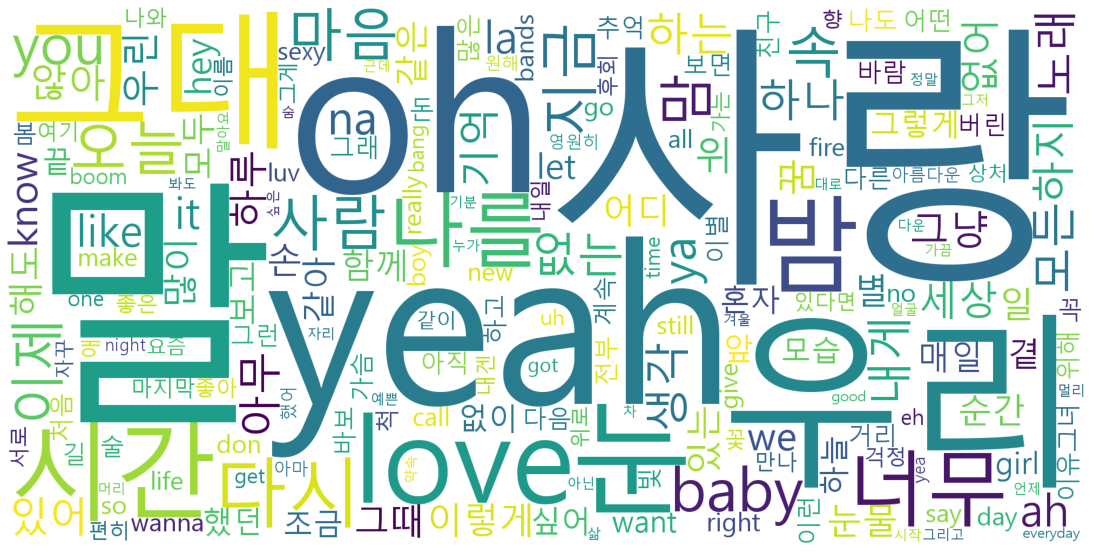

In [263]:
word_cloud.generate_from_frequencies(word_dic_m)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

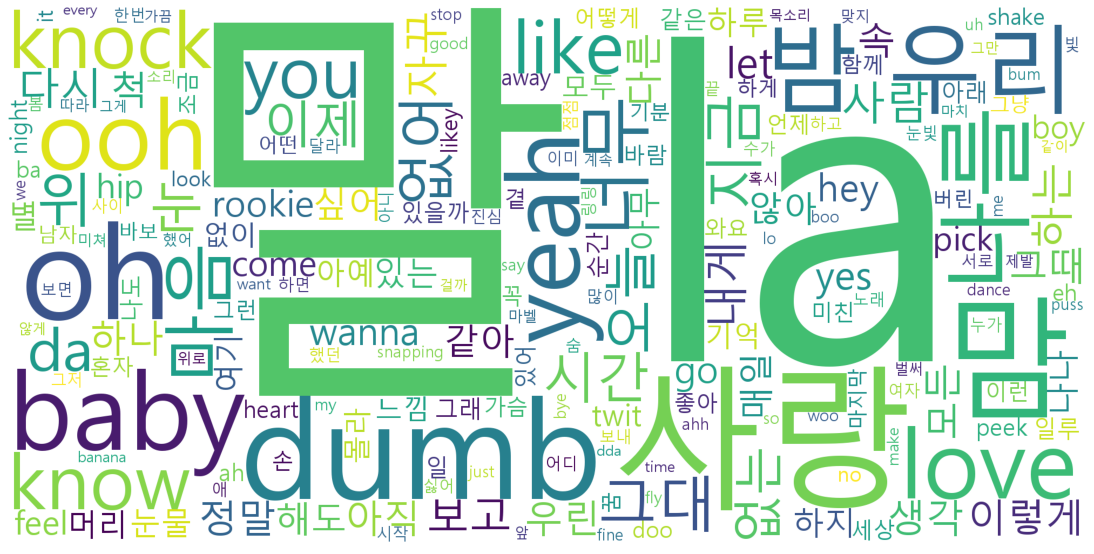

In [264]:
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 장르별 가사 차이 

## 남힙합

In [265]:
m_hiphop = m[m['Genre'] == '랩/힙합']
m_hip.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
0,50.0,2020.0,00:00 (Zero O’Clock),방탄소년단,랩/힙합,그런 날 있잖아/이유 없이 슬픈 날/몸은 무겁고/나 빼곤 모두 다/바쁘고 치열해 보...
6,37.0,2015.0,거북선 (Feat. 팔로알토),Ja Mezz,랩/힙합,우린 거북선 다른 배들 통통\n그냥 통통 떨어져라 똥통\n커지는 네 동공 느껴지는 ...
8,16.0,2015.0,겁 (Feat. 태양),MINO (송민호),랩/힙합,뒤돌아 봤을 때/생각보다 멀리/와있었어 난 혼자였고/문득 겁이 났지/내가 날 봤을 ...
22,82.0,2017.0,기다렸다 가,다이나믹 듀오,랩/힙합,일이 피곤했나/오늘따라 한 두 잔에 퍼지네/반 뼘짜리 위로/한숨 피우고 나니/기분이...
24,92.0,2020.0,깡 Official Remix,식케이 (Sik-K),랩/힙합,Yeah yeah H1GHR GGANG /back at it again/Yeah y...


In [266]:
m_hiphop_lyrics = m_hiphop['Lyric'].tolist()
for i in range(len(m_hiphop_lyrics)):
    m_hiphop_lyrics[i] = str(m_hiphop_lyrics[i])
m_hiphop_lyrics = ''.join(m_hiphop_lyrics)
m_hiphop_lyrics[:100000]   
okt = Okt()
m_hiphop_sample = okt.pos(m_hiphop_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리     



m_hiphop_cleaned = []
for word in m_hiphop_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
                m_hiphop_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                m_hiphop_cleaned.append(word[0].lower()) 

hiphop_dic = {}

for word in m_hiphop_cleaned:
    if word not in hiphop_dic:
        hiphop_dic[word] = 1 # changed from "0" to "1"
    else:
        hiphop_dic[word] += 1

m_hiphop_dic = sorted(hiphop_dic.items(), key=lambda x:x[1], reverse=True)
m_hiphop_dic

[('yeah', 194),
 ('oh', 135),
 ('ya', 119),
 ('눈', 106),
 ('말', 101),
 ('we', 95),
 ('love', 90),
 ('우리', 87),
 ('la', 86),
 ('시간', 78),
 ('like', 77),
 ('밤', 70),
 ('you', 64),
 ('사랑', 64),
 ('위', 63),
 ('baby', 63),
 ('know', 62),
 ('돈', 61),
 ('우린', 59),
 ('이제', 58),
 ('많이', 58),
 ('모든', 57),
 ('별', 57),
 ('그냥', 56),
 ('너무', 56),
 ('노래', 55),
 ('하는', 55),
 ('오늘', 51),
 ('속', 51),
 ('하나', 50),
 ('day', 50),
 ('bands', 50),
 ('나를', 49),
 ('지금', 48),
 ('없어', 47),
 ('다음', 46),
 ('꿈', 45),
 ('say', 45),
 ('na', 45),
 ('bang', 44),
 ('still', 44),
 ('아무', 43),
 ('make', 42),
 ('fire', 42),
 ('let', 41),
 ('않아', 40),
 ('give', 40),
 ('하늘', 39),
 ('boy', 39),
 ('right', 39),
 ('사람', 38),
 ('그리고', 38),
 ('편히', 38),
 ('생각', 37),
 ('all', 37),
 ('내게', 36),
 ('없는', 35),
 ('손', 35),
 ('하지', 35),
 ('위해', 35),
 ('girl', 35),
 ('hey', 35),
 ('아마', 34),
 ('계속', 34),
 ('요즘', 34),
 ('everyday', 34),
 ('보고', 33),
 ('애', 33),
 ('북', 33),
 ('gonna', 32),
 ('술', 32),
 ('있어', 32),
 ('친구', 32),
 ('차', 32),


In [267]:
# # 생략 없이 전체 단어 보기 
# for i in m_hiphop_word_dic:
#     print(i)

In [268]:
word_cloud.generate_from_frequencies(hiphop_dic)

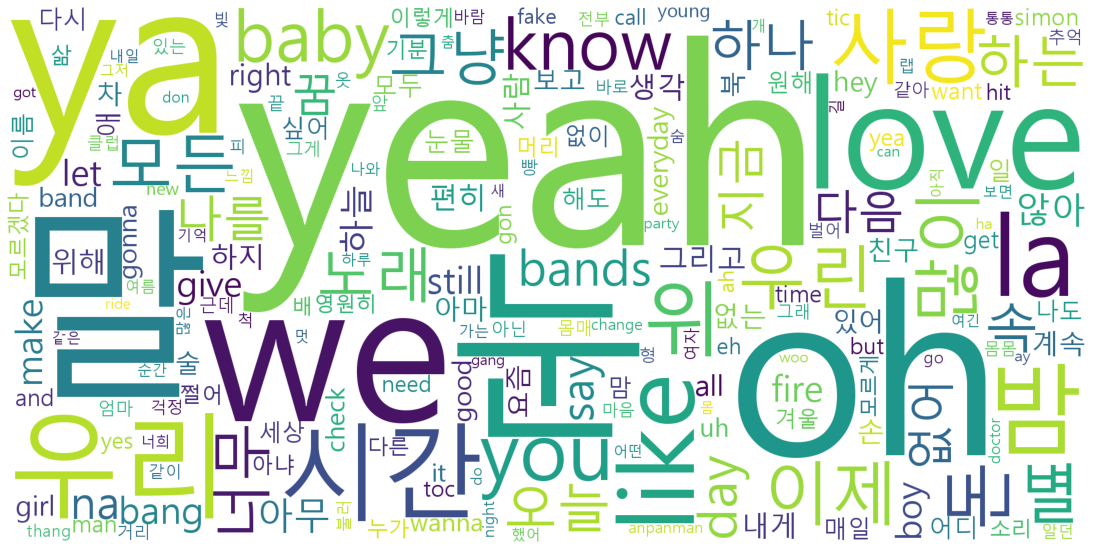

In [269]:
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 여힙합

In [270]:
w_hiphop = w[w['Genre'] == '랩/힙합']
w_hiphop.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
31,21,2017,널 너무 모르고,헤이즈 (Heize),랩/힙합,이제는 알아 말 안 해도/왜 이리도 쉬운 걸 몰랐을까/이 옷들을 고를 시간에/30분...
32,38,2020,눈누난나 (NUNU NANA),제시 (Jessi),랩/힙합,I’m trying to give u/something more/So come wi...
34,17,2015,Puss (Prod.by 라이머),지민,랩/힙합,I'm the mother Fucking top madam 삼촌들 용돈 뺏는 깡패 ...
42,5,2018,뚜두뚜두 (DDU-DU DDU-DU),BLACKPINK,랩/힙합,착한 얼굴에 그렇지 못한 태도/가녀린 몸매 속/가려진 volume은 두 배로/거침없...
43,39,2019,띵 (Prod. By 기리보이),Jvcki Wai,랩/힙합,아마 난 이번 겨울이 끝나도/살아남을 거야 인마/너는 말했지/여자 래퍼 수명 2년이...


In [271]:
w_hiphop[w_hiphop['Lyric'].str.contains('lo')]

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
31,21,2017,널 너무 모르고,헤이즈 (Heize),랩/힙합,이제는 알아 말 안 해도/왜 이리도 쉬운 걸 몰랐을까/이 옷들을 고를 시간에/30분...
32,38,2020,눈누난나 (NUNU NANA),제시 (Jessi),랩/힙합,I’m trying to give u/something more/So come wi...
76,93,2015,슈퍼스타 (Prod. by D.O),키썸 (Kisum),랩/힙합,Hello my name K I S U M /뮤직 거꾸로 뒤집어 M U S I K ...
119,31,2016,휘파람,BLACKPINK,랩/힙합,Hey boy/Make’ em whistle/like a missile bomb b...
148,42,2019,Kill This Love,BLACKPINK,랩/힙합,천사 같은 Hi 끝엔 악마 같은 Bye/매번 미칠듯한 High 뒤엔 뱉어야/하는 P...
170,85,2018,SOLO,제니 (JENNIE),랩/힙합,천진난만 청순가련/새침한 척 이젠 지쳐 나/귀찮아/매일 뭐 해 어디야 밥은 잘 자/...


In [272]:
w_hiphop_lyrics = w_hiphop['Lyric'].tolist()
for i in range(len(w_hiphop_lyrics)):
    w_hiphop_lyrics[i] = str(w_hiphop_lyrics[i])
w_hiphop_lyrics = ''.join(w_hiphop_lyrics)
w_hiphop_lyrics[:100000]   
okt = Okt()
w_hiphop_sample = okt.pos(w_hiphop_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리     


w_hiphop_cleaned = []
for word in w_hiphop_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            w_hiphop_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                w_hiphop_cleaned.append(word[0].lower()) 

hiphop_dic = {}

for word in w_hiphop_cleaned:
    if word not in hiphop_dic:
        hiphop_dic[word] = 1 # changed from "0" to "1"
    else:
        hiphop_dic[word] += 1

w_hiphop_dic = sorted(hiphop_dic.items(), key=lambda x:x[1], reverse=True)
w_hiphop_dic

[('puss', 30),
 ('lo', 30),
 ('미친', 25),
 ('like', 20),
 ('머리', 19),
 ('love', 18),
 ('우리', 17),
 ('미쳐', 17),
 ('누나', 16),
 ('du', 15),
 ('uh', 15),
 ('뜨거워', 15),
 ('내게', 12),
 ('파람', 12),
 ('나를', 11),
 ('away', 10),
 ('지금', 10),
 ('im', 10),
 ('위', 10),
 ('ddu', 10),
 ('누가', 10),
 ('먹어', 10),
 ('hater', 10),
 ('kill', 10),
 ('모르고', 9),
 ('눈', 9),
 ('em', 9),
 ('got', 9),
 ('top', 9),
 ('밤', 9),
 ('말', 8),
 ('모두', 8),
 ('going', 8),
 ('bomb', 8),
 ('이제', 7),
 ('so', 7),
 ('come', 7),
 ('freaking', 7),
 ('you', 7),
 ('하지', 7),
 ('fire', 7),
 ('이미', 7),
 ('같이', 7),
 ('빛', 7),
 ('solo', 7),
 ('맘', 6),
 ('girl', 6),
 ('give', 6),
 ('oh', 6),
 ('나나', 6),
 ('baby', 6),
 ('bitch', 6),
 ('man', 6),
 ('make', 6),
 ('불', 6),
 ('띵하게', 6),
 ('차가워', 6),
 ('어디', 6),
 ('let', 6),
 ('보고', 6),
 ('난리', 6),
 ('sorry', 6),
 ('time', 6),
 ('this', 6),
 ('정말', 5),
 ('뭐라', 5),
 ('aye', 5),
 ('척', 5),
 ('cuz', 5),
 ('없어', 5),
 ('정복', 5),
 ('우린', 5),
 ('hit', 5),
 ('띵곡', 5),
 ('whistle', 5),
 ('every', 5),
 ('

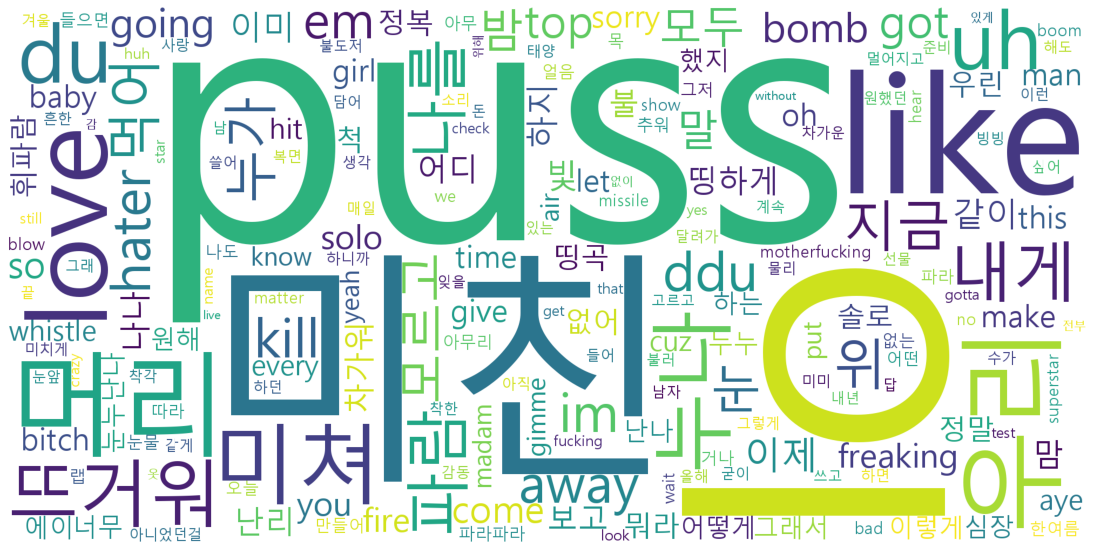

In [273]:
word_cloud.generate_from_frequencies(hiphop_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 남댄스

In [274]:
m_dance = m[m['Genre'] == '댄스']
m_dance.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
64,36,2015,맙소사,"황태지 (황광희, 태양, 지드래곤)",댄스,Give Me That Drop That/Give Me That/맙소사/I Love...
88,63,2016,불타오르네 (FIRE),방탄소년단,댄스,불타오르네/Fire/Fire/Fire/Fire/When I wake up in my...
111,95,2016,센치해,WINNER,댄스,밤이 되면 어김없이 /찾아오는 이 느낌이 /왠지 원망스러워 /괜히 또 전화 걸어 봐...
112,90,2018,"셋 셀테니 (1, 2, 3!)",승리,댄스,이 살가죽 속엔 네가 있어/넌 말해줘도 모를 거야/그런 자태를 가졌으니/눈은 네 구...
137,71,2018,약속해요 (I.P.U.),Wanna One (워너원),댄스,벚꽃이 떨어지던 날 그댈 처음 만났죠/낯설은 떨림과 두려운 설렘들이 /뒤섞이던 날/...


In [275]:
m_dance_lyrics = m_dance['Lyric'].tolist()
for i in range(len(m_dance_lyrics)):
    m_dance_lyrics[i] = str(m_dance_lyrics[i])
m_dance_lyrics = ''.join(m_dance_lyrics)
m_dance_lyrics[:100000]   
okt = Okt()
m_dance_sample = okt.pos(m_dance_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

m_dance_cleaned = []
for word in m_dance_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            m_dance_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                m_dance_cleaned.append(word[0].lower()) 

word_dic = {}

for word in m_dance_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

m_dance_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
m_dance_word_dic

[('oh', 147),
 ('yeah', 116),
 ('baby', 90),
 ('it', 79),
 ('love', 74),
 ('really', 58),
 ('말', 54),
 ('luv', 51),
 ('so', 46),
 ('sexy', 43),
 ('hey', 41),
 ('call', 41),
 ('la', 40),
 ('boom', 37),
 ('no', 37),
 ('오늘', 36),
 ('like', 36),
 ('너무', 36),
 ('맘', 36),
 ('다운', 36),
 ('나를', 35),
 ('new', 33),
 ('you', 31),
 ('밤', 31),
 ('눈', 31),
 ('right', 31),
 ('이제', 30),
 ('na', 30),
 ('go', 29),
 ('지금', 28),
 ('하지', 27),
 ('ah', 26),
 ('face', 25),
 ('우리', 24),
 ('사랑', 24),
 ('girl', 24),
 ('nanana', 24),
 ('let', 21),
 ('조금', 21),
 ('hot', 21),
 ('그래', 21),
 ('know', 21),
 ('don', 21),
 ('just', 21),
 ('없는', 20),
 ('millions', 20),
 ('속', 19),
 ('아름다운', 19),
 ('want', 19),
 ('ya', 19),
 ('got', 19),
 ('좋아', 19),
 ('tempo', 19),
 ('fire', 18),
 ('해도', 18),
 ('말아요', 18),
 ('두근', 18),
 ('낯선', 18),
 ('the', 17),
 ('불', 17),
 ('wow', 17),
 ('eh', 17),
 ('mess', 17),
 ('전부', 16),
 ('night', 16),
 ('마음', 16),
 ('내게', 16),
 ('약속', 16),
 ('순간', 16),
 ('feel', 16),
 ('babe', 16),
 ('wing', 16)

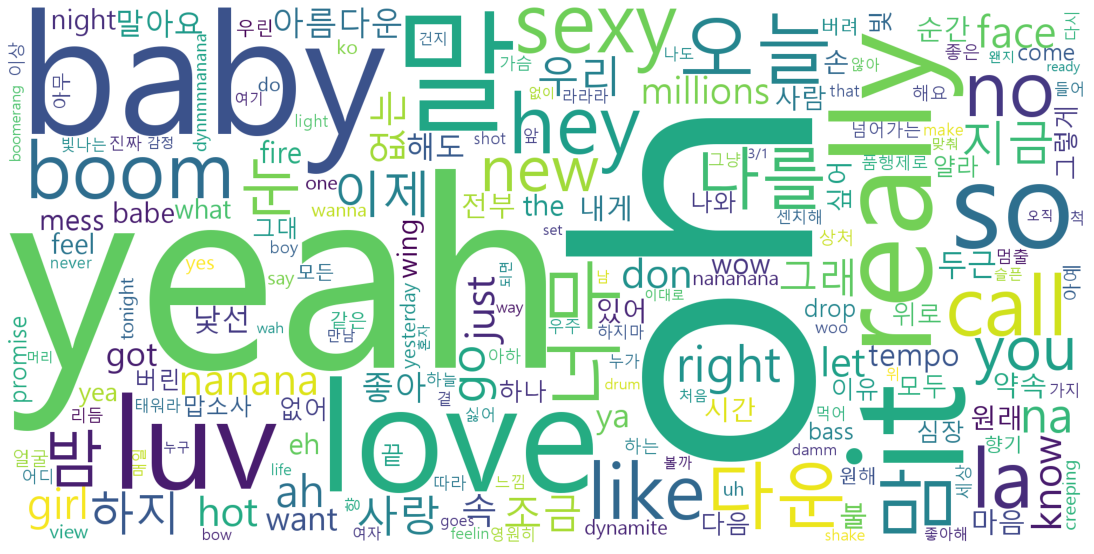

In [276]:
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 여 댄스

In [279]:
w_hiphop = w[w['Genre'] == '댄스']
w_hiphop.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
2,42,2018,1도 없어,Apink (에이핑크),댄스,I’m so sick of lying/You gotta know that/잘 지내 ...
3,37,2017,가시나,선미,댄스,너의 싸늘해진 그 눈빛이/나를 죽이는 거야 /커지던 니 맘의 불씨/재만 남은 거야 ...
6,76,2016,같은 곳에서,소녀온탑,댄스,거릴 걷다 한번 씩 그 노래 들리면 /가끔 니가 생각나 /Say hello to y...
8,65,2019,고고베베 (gogobebe),마마무 (Mamamoo),댄스,일루와 일루와 일루와 일루와/일루와 일루와/일루와 일루와 일루와 일루와/일루와 일루...
16,50,2017,나로 말할 것 같으면 (Yes I am),마마무 (Mamamoo),댄스,나로 말할 것 /같으면 자신감 있는 여자 /말하자면 느낌 있는 여자 /자신 있으면 ...


In [280]:
w_dance_lyrics = w_dance['Lyric'].tolist()
for i in range(len(w_dance_lyrics)):
    w_dance_lyrics[i] = str(w_dance_lyrics[i])
w_dance_lyrics = ''.join(w_dance_lyrics)
w_dance_lyrics[:100000]   
okt = Okt()
w_dance_sample = okt.pos(w_dance_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  

w_dance_cleaned = []
for word in w_dance_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            w_dance_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                w_dance_cleaned.append(word[0].lower()) 

word_dic = {}

for word in w_dance_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

w_dance_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
w_dance_word_dic

[('la', 323),
 ('dumb', 223),
 ('말', 164),
 ('baby', 160),
 ('oh', 158),
 ('ooh', 153),
 ('knock', 135),
 ('맘', 132),
 ('yeah', 122),
 ('love', 112),
 ('da', 112),
 ('know', 103),
 ('밤', 92),
 ('like', 90),
 ('위', 86),
 ('사랑', 82),
 ('너무', 78),
 ('나를', 72),
 ('없어', 71),
 ('wanna', 69),
 ('지금', 66),
 ('hey', 66),
 ('let', 66),
 ('rookie', 66),
 ('you', 63),
 ('yes', 63),
 ('시간', 62),
 ('우리', 62),
 ('자꾸', 60),
 ('go', 60),
 ('hip', 60),
 ('pick', 58),
 ('twit', 56),
 ('아예', 56),
 ('마음', 54),
 ('boy', 54),
 ('하나', 53),
 ('peek', 52),
 ('느낌', 50),
 ('다른', 48),
 ('속', 48),
 ('일루', 48),
 ('눈', 48),
 ('heart', 48),
 ('ba', 48),
 ('몰라', 47),
 ('나나', 46),
 ('feel', 46),
 ('아래', 46),
 ('없는', 45),
 ('오늘', 45),
 ('해도', 43),
 ('와요', 42),
 ('likey', 42),
 ('생각', 41),
 ('shake', 41),
 ('이제', 40),
 ('같아', 39),
 ('come', 38),
 ('않아', 37),
 ('night', 37),
 ('좋아', 36),
 ('ah', 36),
 ('snapping', 36),
 ('우린', 35),
 ('look', 34),
 ('매일', 33),
 ('하는', 33),
 ('내게', 33),
 ('good', 33),
 ('그래', 32),
 ('dance',

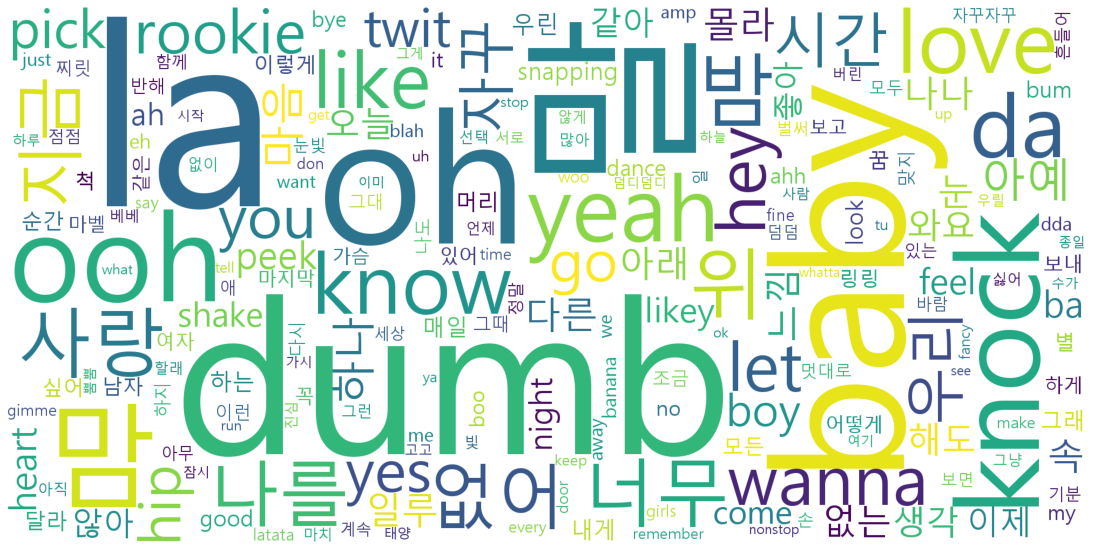

In [281]:
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 남 발라드

In [282]:
m_balad = m[m['Genre'] == '발라드']
m_balad.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
1,82,2015,가슴 뛰도록,SG 워너비,발라드,사랑해 사랑해 사랑해 /매일 아침 눈을 뜰 때마다 /나를 설레게 하는 사람 /나의 ...
2,16,2018,가을 안부,먼데이 키즈 (Monday Kiz),발라드,어떠니 잘 지냈니 지난 여름/유난히도 힘에 겹더라 올핸/새벽녘엔 제법 쌀쌀한 바람이...
3,50,2018,가을 타나 봐,바이브,발라드,계절은 돌고 돌아 돌아오는데/사랑은 돌고 돌아 떠나버리고/추억을 돌고 돌아 멈춰 서...
6,9,2016,걱정말아요 그대,이적,발라드,그대여 아무 걱정 하지 말아요/우리 함께 노래 합시다/그대 아픈 기억들 모두 그대여...
8,83,2018,고백,양다일,발라드,미소짓던 그 표정이/시도 때도 없던 입맞춤이/주고받던 연락들이/아쉬움 가득한 헤어짐...


In [283]:
m_balad_lyrics = m_balad['Lyric'].tolist()
for i in range(len(m_balad_lyrics)):
    m_balad_lyrics[i] = str(m_balad_lyrics[i])
m_balad_lyrics = ''.join(m_balad_lyrics)
m_balad_lyrics[:100000]   
okt = Okt()
m_balad_sample = okt.pos(m_balad_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  


m_balad_cleaned = []
for word in m_balad_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            m_balad_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                m_balad_cleaned.append(word[0].lower()) 

word_dic = {}

for word in m_balad_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

m_balad_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
m_balad_word_dic

[('사랑', 305),
 ('말', 230),
 ('그대', 176),
 ('우리', 141),
 ('다시', 111),
 ('사람', 85),
 ('나를', 70),
 ('마음', 70),
 ('생각', 67),
 ('하루', 66),
 ('기억', 66),
 ('눈', 65),
 ('너무', 64),
 ('시간', 64),
 ('맘', 63),
 ('그때', 61),
 ('오늘', 59),
 ('내게', 57),
 ('지금', 56),
 ('있는', 55),
 ('없는', 55),
 ('모든', 50),
 ('했던', 48),
 ('눈물', 47),
 ('함께', 47),
 ('세상', 46),
 ('가슴', 45),
 ('곁', 44),
 ('혼자', 44),
 ('있어', 44),
 ('하는', 43),
 ('이제', 43),
 ('이별', 42),
 ('속', 41),
 ('해도', 40),
 ('이렇게', 40),
 ('같은', 39),
 ('봄', 38),
 ('그렇게', 37),
 ('같아', 36),
 ('매일', 35),
 ('보고', 35),
 ('일', 35),
 ('바보', 35),
 ('하나', 34),
 ('노래', 34),
 ('모습', 34),
 ('ah', 34),
 ('어떤', 33),
 ('아직', 32),
 ('아무', 32),
 ('조금', 32),
 ('앞', 32),
 ('바람', 31),
 ('밤', 31),
 ('하지', 31),
 ('순간', 31),
 ('life', 31),
 ('끝', 30),
 ('처음', 30),
 ('꿈', 29),
 ('beautiful', 29),
 ('후회', 28),
 ('그냥', 28),
 ('버린', 27),
 ('추억', 27),
 ('않아', 27),
 ('손', 27),
 ('많은', 26),
 ('모두', 26),
 ('만나', 26),
 ('꼭', 26),
 ('그리워', 25),
 ('없이', 25),
 ('내겐', 25),
 ('다른', 25),
 ('마지막',

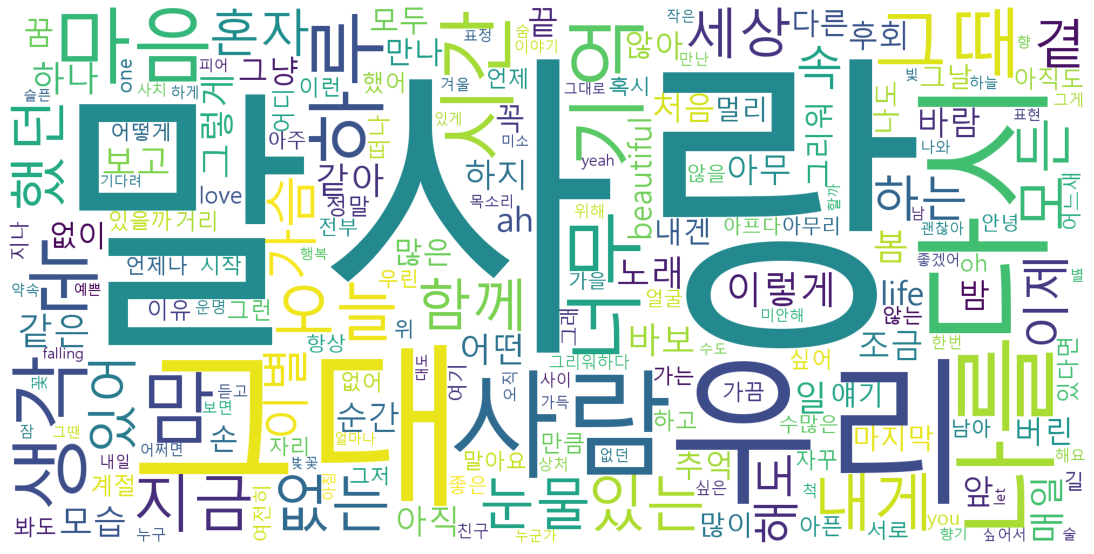

In [284]:
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 여 발라드

In [285]:
w_balad = w[w['Genre'] == '발라드']
w_balad.head()

,Unnamed: 0,Year,Title,Artist,Genre,Lyric
1,20,2019,180도,벤,발라드,사랑 다 비슷해 그래 다 비슷해/너는 다르길 바랐는데/넌 뭐가 미안해 왜 맨날 미안...
5,67,2019,가을밤 떠난 너,케이시 (Kassy),발라드,가을밤 떠난 너/그런 너를 기다리는 나/그 계절은 다시 돌아/너를 생각나게 해/사랑...
7,79,2020,거짓말이라도 해서 널 보고싶어,백지영,발라드,내가 미안해 /이렇게 아플 줄도 모르고 /너에게 모질게도 대했던 바보야/후회에 맘을...
9,62,2016,구르미 그린 달빛,거미,발라드,말하지 않아도 난 알아요/그대 안에 오직 한사람/바로 나란걸/떨리는 내 맘을 들킬까...
11,33,2019,그대라는 시,태연 (TAEYEON),발라드,언제부터인지 그대를 보면/운명이라고 느꼈던 걸까/밤하늘의 별이 빛난 것처럼/오랫동안...


In [286]:
w_balad_lyrics = w_balad['Lyric'].tolist()
for i in range(len(w_balad_lyrics)):
    w_balad_lyrics[i] = str(w_balad_lyrics[i])
w_balad_lyrics = ''.join(w_balad_lyrics)
w_balad_lyrics[:100000]   
okt = Okt()
w_balad_sample = okt.pos(w_balad_lyrics, norm=True)

del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
add_list = [ '말', '눈', '밤', '속', '맘', '꿈', '위', '손', '별', '일', '곁', '끝', '앞', '돈', '길','빛', '봄', '척', '꼭', '술', '꽃', '애', '향', '삶', '차', '숨', '새', '잠', '불', '북', '남', '힘', '배', '달', '피', '옷', '몸', '춤', '발', '방', '빵', '개', '형', '답', '랩', '멋', '욕', '땀', '법', '꽉', '점', '귀', '밑','잎', '덕', '틈', '문', '감', '물', '탓', '뇌', '목', '키' ]
stop_words = stopwords.words('english')  #영어 불용어 처리  


w_balad_cleaned = []
for word in w_balad_sample:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ", " 와 같이 제외되어야할 항목들
        if (word[0] not in del_list) & (word[0] not in stop_words) & (len(word[0]) != 1): # 원치 않는 단어들을 제외 & 영어 불용어 
            w_balad_cleaned.append(word[0].lower())  #소문자처리
        elif len(word[0]) == 1:
            if word[0] in add_list:
                w_balad_cleaned.append(word[0].lower()) 

word_dic = {}

for word in w_balad_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1

w_balad_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
w_balad_word_dic

[('사랑', 160),
 ('말', 110),
 ('그대', 69),
 ('우리', 48),
 ('그때', 46),
 ('맘', 43),
 ('사람', 42),
 ('doo', 42),
 ('아직', 41),
 ('마음', 40),
 ('나를', 37),
 ('정말', 33),
 ('눈물', 33),
 ('다시', 32),
 ('기억', 32),
 ('모든', 30),
 ('밤', 28),
 ('이렇게', 26),
 ('하루', 26),
 ('없는', 26),
 ('시간', 24),
 ('없어', 24),
 ('눈', 23),
 ('여기', 23),
 ('혼자', 22),
 ('했던', 22),
 ('곁', 22),
 ('이제', 21),
 ('너무', 20),
 ('지금', 19),
 ('하지', 19),
 ('바보', 19),
 ('보고', 19),
 ('내게', 19),
 ('아무', 19),
 ('이유', 18),
 ('추억', 18),
 ('있을까', 18),
 ('많이', 17),
 ('싶어', 17),
 ('하는', 17),
 ('하고', 17),
 ('언제', 16),
 ('생각', 16),
 ('이별', 16),
 ('love', 16),
 ('모두', 15),
 ('제발', 15),
 ('일', 15),
 ('그런', 14),
 ('없이', 14),
 ('가슴', 14),
 ('함께', 14),
 ('우린', 14),
 ('매일', 14),
 ('있어', 14),
 ('오늘', 14),
 ('ah', 14),
 ('그래', 13),
 ('속', 13),
 ('바람', 13),
 ('혹시', 13),
 ('향', 13),
 ('언젠가', 13),
 ('조금', 13),
 ('순간', 13),
 ('미안해', 12),
 ('진심', 12),
 ('한다고', 12),
 ('척', 12),
 ('싶은', 12),
 ('후회', 12),
 ('세상', 12),
 ('자꾸', 12),
 ('어떤', 12),
 ('처음', 12),
 ('앞', 12),

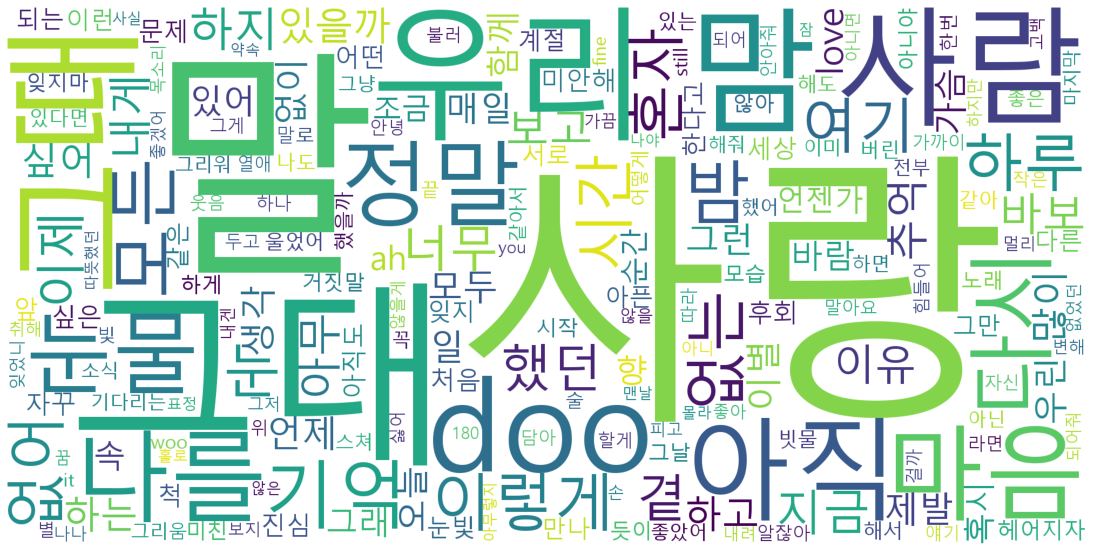

In [287]:
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [105]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

## 다음할일 
- 장르별 데이터프레임으로 정리 
- 정규화 
- 장르별 빈도수 확인